In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager as fm
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
style='darkgrid')

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/피나치공/피나치공_df.csv")

🔮 [배달의민족] 예측 중...


16:10:39 - cmdstanpy - INFO - Chain [1] start processing
16:10:39 - cmdstanpy - INFO - Chain [1] done processing


🔮 [요기요] 예측 중...


16:10:40 - cmdstanpy - INFO - Chain [1] start processing
16:10:40 - cmdstanpy - INFO - Chain [1] done processing


🔮 [전화] 예측 중...


16:10:40 - cmdstanpy - INFO - Chain [1] start processing
16:10:40 - cmdstanpy - INFO - Chain [1] done processing


🔮 [기타] 예측 중...


16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing


🔮 [배민1] 예측 중...


16:10:42 - cmdstanpy - INFO - Chain [1] start processing
16:10:42 - cmdstanpy - INFO - Chain [1] done processing
16:10:42 - cmdstanpy - INFO - Chain [1] start processing


🔮 [쿠팡이츠] 예측 중...


16:10:42 - cmdstanpy - INFO - Chain [1] done processing


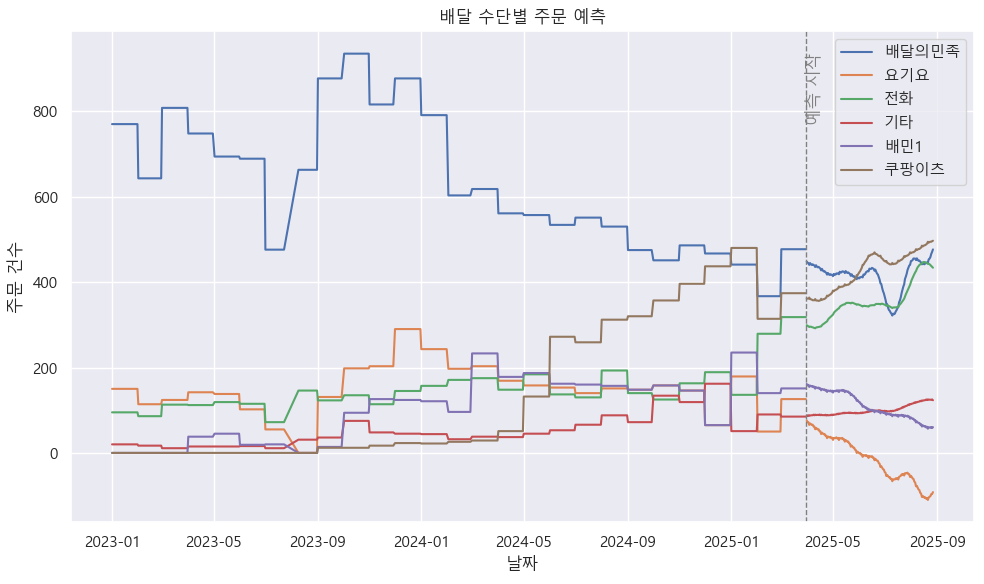

In [24]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df["일시"] = pd.to_datetime(df["일시"])
labels = ["배달의민족", "요기요", "전화", "기타", "배민1", "쿠팡이츠"]

plt.figure(figsize=(10, 6))

for label in labels:
    print(f"🔮 [{label}] 예측 중...")
    df_label = df[['일시', label]].rename(columns={'일시': 'ds', label: 'y'})
    df_label = df_label.dropna()
    
    if len(df_label) < 2:
        print(f"  데이터 부족, 건너뜀: {label}")
        continue

    model = Prophet()
    model.fit(df_label)

    future = model.make_future_dataframe(periods=150)
    forecast = model.predict(future)

    last_date = df_label['ds'].max()

    # 관측값
    plt.plot(df_label['ds'], df_label['y'], label=f'{label}', linestyle='-')

    # 예측값 중 미래 구간
    future_forecast = forecast[forecast['ds'] > last_date]
    plt.plot(future_forecast['ds'], future_forecast['yhat'], linestyle='-', color=plt.gca().lines[-1].get_color())

# 관측과 예측 경계에 세로선 그리기
plt.axvline(x=last_date, color='gray', linestyle='--', linewidth=1)
plt.text(last_date, plt.ylim()[1]*0.95, '예측 시작', rotation=90, verticalalignment='top', color='gray')

plt.title('배달 수단별 주문 예측')
plt.xlabel('날짜')
plt.ylabel('주문 건수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
